***
# ANÁLISE DE DADOS PARA REVENDA DE MOTOCICLETAS 
***

## CONTEXTO DO PROJETO:

As análises contidas neste notebook fazem parte do projeto desenvolvido para a empresa **Xtreme Groovy Bikes Sales (XGB Sales)** revendedora de motocicletas usadas. Com a crescente do valor dos veículos usados, a XGB Sales, deseja expandir os seus negócios. 

O foco da análise de dados é auxiliar a empresa a encontrar as melhores motocicletas para revenda, aumentando assim o lucro da empresa. 

Além disso, o CEO da XGB Sales fez algumas perguntas a cerca da base de dados que a empresa possui que serão respondidas ao longo da análise de dados.

**Lembrando que o contexto, empresa, pessoas e perguntas são completamente fictícios e existem somente na minha imaginação.**

### SUMÁRIO DA ANÁLISE

Para facilitar o entendimento da análise, este projeto foi desenvolvido por seções (descritas abaixo) e subseções.

Em todas as subseções você encontra por escrito quais foram as conclusões tiradas através da exploração dos dados e data visualization. Nos códigos também há o maior número de comentários possíveis, facilitando o entendimento do raciocínio no desenvolvimento deste notebook.

**1. Importação de libraries e dataset**

**2. Descrição do dataset:**
     
     O objetivo é entender o tamanho do dataset, identificar informaçoes incorretas e dados faltantes.
    
**3. Análises exploratória de dados**

    Análise de informações gerais do dataset para entender melhor o dataset e os dados que serão trabalhados. A familiaridade com o dataset auxiliará na formação de hipóteses no próximo passo, este com as análises focadas em responder a pergunta: quais são as melhores motocicletas para revenda?  
    
**4.Conclusão do projeto**

    Considerações finais do projeto.

# IMPORTAÇÃO DE LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import math

# IMPORTAÇÃO DATASET

In [2]:
df_moto = pd.read_csv('bikes_completed.csv')
df_moto.shape

In [3]:
# Visualizando o dataframe com dados aleatórios
df_moto.sample(5)

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
797,797,Royal Enfield Electra Twinspark,120000.0,2016,Individual,1st owner,345000,NaN,69,6,Royal Enfield
843,843,Hero Splendor Plus,65000.0,2018,Individual,1st owner,7500,NaN,2,4,Hero
629,629,Yamaha YZF R15 [2011-2018],80000.0,2017,Individual,1st owner,27000,118997.0,6,5,Yamaha
181,181,Royal Enfield Electra 5 S,60000.0,2007,Individual,2nd owner,19612,NaN,4,15,Royal Enfield
409,409,Royal Enfield Classic Squadron Blue,140000.0,2017,Individual,1st owner,25000,181445.0,5,5,Royal Enfield


# DESCRIÇÃO DOS DADOS

In [4]:
# Verificando as colunas existentes
df_moto.columns.values

array(['id', 'name', 'selling_price', 'year', 'seller_type', 'owner',
       'km_driven', 'ex_showroom_price', 'km_class', 'age', 'company'],
      dtype=object)

| Coluna | Descrição |
| :----- | :-------- |
| ID | Identificador da linha/registro |
| name | Fabricante e Modelo da Moto |
| selling_price | Preço de Venda |
| year | Ano de Fabricação da Moto |
| seller_type | Tipo de Vendedor - Se é vendedor pessoal (i.e. individual) ou revendedor (i.e. dealer) |
| owner | Se é primeiro, segundo, terceiro ou quarto dono da motocicleta |
| km_driven | Quantidade de Quilometros percorrido pela motocicleta |
| ex_showroom_price | Preço da motocicleta sem as taxas de seguro e registro |

In [5]:
# Tamanho do dataset
df_moto.shape

print('O dataset possui {} linhas e {} colunas'.format(df_moto.shape[0], df_moto.shape[1]))

O dataset possui 1061 linhas e 11 colunas


In [6]:
# Quantas motos temos na base de dados?
print(f'Quantidade de motos na base de dados: {df_moto.shape[0]}')

Quantidade de motos na base de dados: 1061


In [7]:
# Verificando valores nulos
df_moto.isna().sum()

id                     0
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
km_class               0
age                    0
company                0
dtype: int64

In [8]:
# Verificando o tipo de dado
df_moto.dtypes

id                     int64
name                  object
selling_price        float64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
km_class               int64
age                    int64
company               object
dtype: object

In [9]:
# Deixando a coluna selling_price e ex_showroom_price na mesma grandeza
df_moto['selling_price'] = df_moto['selling_price'].astype(float)
df_moto.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,1,3,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,2,5,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,3,4,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,5,7,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,5,11,Yamaha


In [40]:
df_moto.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1061.0,530.00,306.43,0.0,265.0,530.0,795.0,1060.0
selling_price,1061.0,59638.15,56304.29,5000.0,28000.0,45000.0,70000.0,760000.0
year,1061.0,2013.87,4.30,1988.0,2011.0,2015.0,2017.0,2020.0
km_driven,1061.0,34359.83,51623.15,350.0,13500.0,25000.0,43000.0,880000.0
ex_showroom_price,626.0,87958.71,77496.59,30490.0,54852.0,72752.5,87031.5,1278000.0
km_class,1061.0,7.20,10.28,1.0,3.0,5.0,9.0,176.0
age,1061.0,8.13,4.30,2.0,5.0,7.0,11.0,34.0


- O valor máximo de 'km_drive' = 880000 é equivalente a mais de 20 voltas ao redor do planeta.
- Há a possibilidade de ser um erro de input de dados, portanto, excluirei esse registro do dataset.

In [43]:
df_moto.loc[df_moto['km_driven'] == 880000, :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
642,642,TVS Apache RTR 160,15000.0,2009,Individual,4th owner,880000,NaN,176,13,TVS


# ENTENDENDO OS DADOS

## Dados numéricos

In [12]:
# Visualização geral das informações das variáveis numéricas
df_moto[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].agg(
    ['mean', 'median', 'std', 'min', 'max', 'ptp', 'skew',
     'kurtosis']).round(2).T.reset_index().rename(columns={
         'index': 'Attributes',
         'ptp': 'range'
     })

,Attributes,mean,median,std,min,max,range,skew,kurtosis
0,selling_price,59638.15,45000.0,56304.29,5000.0,760000.0,755000.0,4.99,47.26
1,year,2013.87,2015.0,4.30,1988.0,2020.0,32.0,-1.40,3.22
2,km_driven,34359.83,25000.0,51623.15,350.0,880000.0,879650.0,9.31,115.82
3,ex_showroom_price,87958.71,72752.5,77496.59,30490.0,1278000.0,NaN,8.44,104.40


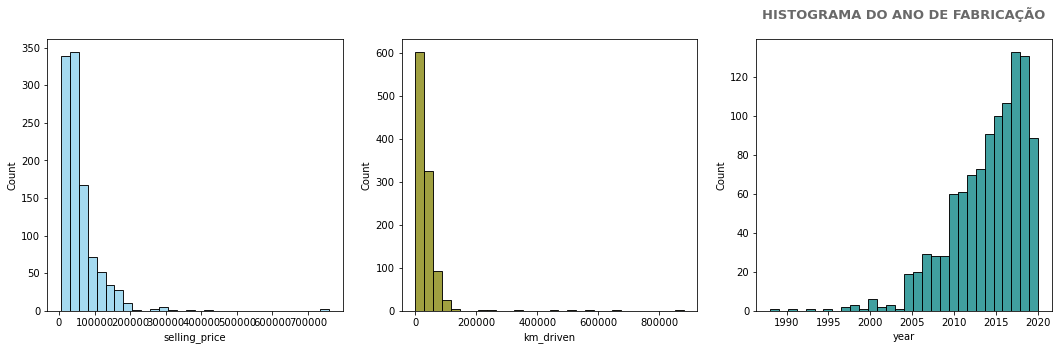

In [13]:
# Colocar titulos em cada gráfico, linha de média e linha de mediana, colocar label no eixo x.

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Preço de venda
sns.histplot(df_moto.selling_price,
             bins=30,
             color='skyblue',
             ax=axs[0])

# Quantidade de Quilometros percorrido pela motocicleta
sns.histplot(df_moto.km_driven,
             bins=30,
             color='olive',
             ax=axs[1])

# Ano de fabricação da moto
sns.histplot(df_moto.year,
             bins=30,
             color='teal',
             ax=axs[2])
ax = plt.title('HISTOGRAMA DO ANO DE FABRICAÇÃO',
          pad=20,
          fontsize=13,
          color='dimgrey',
          fontweight='bold')

## Dados categóricos

In [14]:
# Quantos valores únicos existem para cada variável categórica?
df_moto.select_dtypes(include=['object']).nunique()

name           279
seller_type      2
owner            4
company         20
dtype: int64

In [15]:
# Tipo de Vendedor - Quantas motocicletas são vendidas pelo dono e quantas são vendidas por revendedores?
df_moto['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [16]:
# Quantas motocicletas são vendidas pelo primeiro, segundo, terceiro ou quarto dono?
df_moto['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

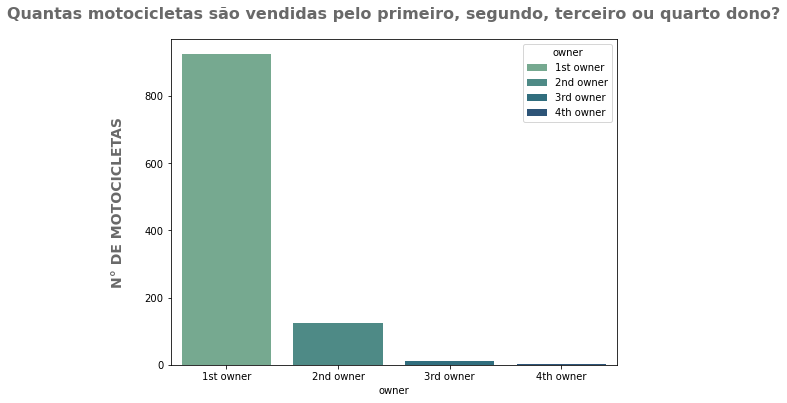

In [24]:
plt.figure(figsize=(8, 6))

sns.countplot(x='owner',
              data=df_moto,
              palette='crest',
              hue='owner',
              dodge=False)
plt.ylabel('N° DE MOTOCICLETAS', color='dimgrey', labelpad = 20, fontsize = 14, fontweight='bold')
plt.title(
    'Quantas motocicletas são vendidas pelo primeiro, segundo, terceiro ou quarto dono?',
    pad=20,
    fontsize=16,
    color='dimgrey',
    fontweight='bold');

In [18]:
# Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?
df_moto['company'].value_counts(ascending=False)

Bajaj              260
Hero               232
Honda              204
Royal Enfield      109
Yamaha             102
TVS                 69
Suzuki              30
KTM                 24
Mahindra             6
Kawasaki             4
Vespa                4
UM                   3
Activa               3
Jawa                 3
Harley-Davidson      2
Aprilia              2
BMW                  1
Benelli              1
Yo                   1
Hyosung              1
Name: company, dtype: int64

In [19]:
# Existem 279 modelos de motocicletas no dataset
# Quais são os modelos mais colocados a venda no dataset?
df_moto['name'].value_counts(ascending=False)

Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
                                 ..
Hero Honda CD100SS                1
Royal Enfield Thunderbird 500     1
BMW G310GS                        1
TVS Radeon                        1
Bajaj  ct 100                     1
Name: name, Length: 279, dtype: int64

## Fabricante da motocicleta X Preço de venda

**Qual das fabricantes possui o maior preço médio de suas motos?**

In [53]:
df_moto[['company', 'selling_price']].groupby('company').mean().round(
    2).sort_values('selling_price', ascending=False).reset_index()

,company,selling_price
0,Harley-Davidson,540000.00
1,BMW,300000.00
2,Kawasaki,287500.00
3,Jawa,175000.00
4,Benelli,160000.00
5,UM,156666.67
6,KTM,155708.33
7,Hyosung,135000.00
8,Royal Enfield,128549.54
9,Suzuki,73800.00


**Qual das fabricantes possui o maior preço mediano de suas motos?**

In [54]:
df_moto[['company', 'selling_price']].groupby('company').median().round(
    2).sort_values('selling_price', ascending=False).reset_index()

,company,selling_price
0,Harley-Davidson,540000.0
1,BMW,300000.0
2,Kawasaki,300000.0
3,Jawa,180000.0
4,Benelli,160000.0
5,UM,160000.0
6,KTM,142500.0
7,Hyosung,135000.0
8,Royal Enfield,123000.0
9,Aprilia,70000.0


## Fabricante da motocicleta X Quilometragem

**Qual das fabricantes possui a maior quilometragem em média de suas motos?**

In [55]:
df_moto[['company', 'km_driven']].groupby('company').mean().round(
    2).sort_values('km_driven', ascending=False).reset_index()

,company,km_driven
0,Activa,167266.67
1,Hero,44328.34
2,Honda,36745.24
3,Bajaj,33786.13
4,TVS,29684.91
5,Yamaha,28281.86
6,Suzuki,22194.60
7,Royal Enfield,20732.94
8,Vespa,18428.00
9,Hyosung,16500.00


## Fabricante X Ano de fabricação
**Qual o fabricante que possui a moto mais velha?**

In [61]:
df_moto[['company', 'year']].groupby('company').min().sort_values('year')

,year
company,
Bajaj,1988
Royal Enfield,1993
Hero,1997
Yamaha,1997
TVS,1998
Honda,2006
Mahindra,2009
Activa,2010
Suzuki,2010


 **Algumas conclusões:**

 - Existem 1061 motocicletas no dataset
 - Existem 20 marcas de motocicletas no dataset. 
 - Existem 279 modelos de motocicletas
 - A moto mais nova foi fabricada em 2020 e a mais velha em 1988
 - A média do ano de fabricação é 2013
 - A motocicleta mais cara custa USD 760000 e a mais barata USD 5000
 - A média do preço de venda é USD 59638.15
 - A média de quilometragem percorrida é 34359.83, o máximo 880000 e o mínimo 350
 - 1055 motocicletas estão sendo vendidas pelos seus donos e 6 motocicletas estão sendo vendidas por revendedores
 - A maior parte das motocicletas (924) está sendo vendida pelo primeiro dono

# FORMULAÇÃO DAS HIPÓTESES

 1. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos.
 2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos.
 3. As motos que possuiram mais donos são as motos mais velhas na média.
 4. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos.

 ## 1. As motos que possuiram somente 1 dono são motos mais caras na média que as motos que tiveram mais donos.

**Conclusões:**

    - As motocicletas que estão sendo vendidas pelo 4° dono são as mais caras em média. No entanto, a média não é uma medida resistente para valores discrepantes. A motocicleta de id 311, modelo 'Harley-Davidson Street 750' possui um valor de venda alto em comparação as demais motocicletas que são vendidas pelo 4° dono.
    - Neste caso, vamos considerar o valor da mediana. A partir dos valores de mediana podemos concluir que as motos mais caras são as que tiveram 1 dono ou 3 donos. 

Text(0, 0.5, 'PREÇO DE VENDA (USD)')

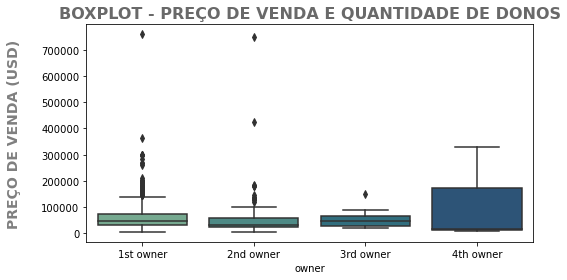

In [37]:
plt.figure(figsize=(8, 4))

sns.boxplot(x='owner', y='selling_price', data=df_moto, palette='crest')

plt.title('BOXPLOT - PREÇO DE VENDA E QUANTIDADE DE DONOS',
          fontsize=16,
          color='dimgrey',
          fontweight='bold')

plt.ylabel('PREÇO DE VENDA (USD)',
           color='grey',
           labelpad=20,
           fontsize=14,
           fontweight='bold')

In [35]:
df_moto[['owner', 'selling_price']].groupby('owner').agg(
    ['median', 'mean', 'count']).reset_index()

owner selling_price                     
                    median           mean count
0  1st owner       45000.0   60022.813853   924
1  2nd owner       32000.0   55666.658537   123
2  3rd owner       45000.0   55727.272727    11
3  4th owner       15000.0  118333.333333     3

In [22]:
# Vamos verificar o 'selling_price' das motocicletas vendidas pelo 4° dono.
df_moto.loc[df_moto['owner'] == '4th owner', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
311,311,Harley-Davidson Street 750,330000.0,2014,Individual,4th owner,6500,534000.0,2,8,Harley-Davidson
642,642,TVS Apache RTR 160,15000.0,2009,Individual,4th owner,880000,NaN,176,13,TVS
698,698,Hero Honda CBZ,10000.0,2000,Individual,4th owner,48000,NaN,10,22,Hero


In [23]:
df_moto.loc[df_moto['company'] == 'Harley-Davidson', :]

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,age,company
134,134,Harley-Davidson Street Bob,750000.0,2013,Individual,2nd owner,12000,1278000.0,3,9,Harley-Davidson
311,311,Harley-Davidson Street 750,330000.0,2014,Individual,4th owner,6500,534000.0,2,8,Harley-Davidson


## 2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos.

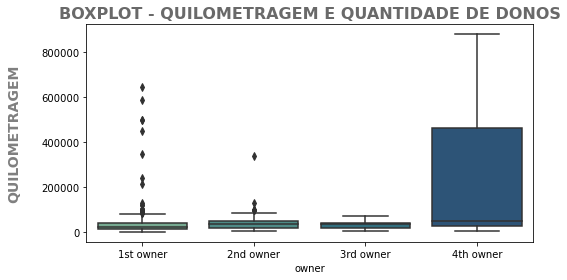

In [31]:
plt.figure(figsize=(8, 4))

sns.boxplot(x='owner', y='km_driven', data=df_moto, palette='crest')

plt.title('BOXPLOT - QUILOMETRAGEM E QUANTIDADE DE DONOS',
          fontsize=16,
          color='dimgrey',
          fontweight='bold')

plt.ylabel('QUILOMETRAGEM',
           color='grey',
           labelpad=20,
           fontsize=14,
           fontweight='bold')

In [38]:
df_moto[['owner', 'km_driven']].groupby(
    'owner').agg(['median', 'mean']).reset_index()

owner km_driven               
                median           mean
0  1st owner   24000.0   32816.583333
1  2nd owner   34000.0   39288.991870
2  3rd owner   35000.0   33292.181818
3  4th owner   48000.0  311500.000000

## 3. As motos que possuiram mais donos são as motos mais velhas na média.

In [29]:
df_moto[['owner', 'year']].groupby('owner').agg(['median', 'mean']).reset_index()

owner    year             
              median         mean
0  1st owner  2015.0  2014.200216
1  2nd owner  2013.0  2012.056911
2  3rd owner  2009.0  2007.818182
3  4th owner  2009.0  2007.666667

## 4. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos.

In [36]:
df_moto[['seller_type', 'selling_price']].groupby('seller_type').agg(['median', 'mean', 'count']).reset_index()

seller_type selling_price                    
                     median          mean count
0      Dealer       44000.0  46666.666667     6
1  Individual       45000.0  59711.923223  1055

## Quais motos eu devo comprar? 
   - Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente.

In [64]:
ano = (df_moto['year'] >= 2018)

km_rodado = (df_moto['km_driven'] <= 40000)

dono = (df_moto['owner'] == '1st owner')

vendedor = (df_moto['seller_type'] == 'Individual')

venda = (df_moto['selling_price'] < df_moto['ex_showroom_price'])

In [73]:
df_selected = df_moto.loc[
    ano & km_rodado & dono & vendedor & venda,
    ['id','name', 'selling_price', 'km_driven', 'year']].sort_values(
        'selling_price', ascending=False)

In [74]:
df_selected.head()

,id,name,selling_price,km_driven,year
344,344,BMW G310GS,300000.0,2500,2018
588,588,Honda CBR-250R,200000.0,5500,2019
865,865,Royal Enfield Thunderbird 500X,185000.0,1500,2018
960,960,Royal Enfield Thunder 500,175000.0,3000,2018
961,961,UM Renegade Mojave,170000.0,1400,2019
